<a href="https://colab.research.google.com/github/jagtapuday/Mnist_Model/blob/main/Mnist_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import os.path as path

import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Input, Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D,Dropout
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [17]:

MODEL_NAME = 'mnist_convnet'
EPOCHS = 40
BATCH_SIZE = 128

In [18]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

In [19]:

def build_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=3, strides=1, \
            padding='same', activation='relu', \
            input_shape=[28, 28, 1]))
    # 28*28*64
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    # 14*14*64

    model.add(Conv2D(filters=128, kernel_size=3, strides=1, \
            padding='same', activation='relu'))
    # 14*14*128
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    # 7*7*128

    model.add(Conv2D(filters=256, kernel_size=3, strides=1, \
            padding='same', activation='relu'))
    # 7*7*256
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    # 4*4*256

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model




In [284]:

def train(model, x_train, y_train, x_test, y_test):
    model.compile(loss=keras.losses.categorical_crossentropy, \
                  optimizer=keras.optimizers.Adadelta(), \
                  metrics=['accuracy'])

    model.fit(x_train, y_train, \
              batch_size=BATCH_SIZE, \
              epochs=EPOCHS, \
              verbose=1, \
              validation_data=(x_test, y_test))

In [ ]:
def main():
    if not path.exists('out'):
        os.mkdir('out')

    x_train, y_train, x_test, y_test = load_data()

    model = build_model()

    train(model, x_train, y_train, x_test, y_test)

    #export_model(tf.train.Saver(), model, ["conv2d_1_input"], "dense_2/Softmax")


In [ ]:
if __name__ == '__main__':
    main()

11493376/11490434 [==============================] - 3s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 123s 2ms/step - loss: 0.2177 - accuracy: 0.9309 - val_loss: 0.0515 - val_accuracy: 0.9832


AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'Saver'

In [20]:
x_train, y_train, x_test, y_test = load_data()

model = build_model()

11493376/11490434 [==============================] - 0s 0us/step


In [286]:
train(model, x_train, y_train, x_test, y_test)

Epoch 1/40
469/469 [==============================] - 5s 11ms/step - loss: 2.2966 - accuracy: 0.1336 - val_loss: 2.2874 - val_accuracy: 0.2010
Epoch 2/40
469/469 [==============================] - 5s 11ms/step - loss: 2.2805 - accuracy: 0.2256 - val_loss: 2.2707 - val_accuracy: 0.4849
Epoch 3/40
469/469 [==============================] - 5s 11ms/step - loss: 2.2631 - accuracy: 0.3217 - val_loss: 2.2515 - val_accuracy: 0.5994
Epoch 4/40
469/469 [==============================] - 5s 11ms/step - loss: 2.2421 - accuracy: 0.3947 - val_loss: 2.2276 - val_accuracy: 0.6266
Epoch 5/40
469/469 [==============================] - 5s 11ms/step - loss: 2.2156 - accuracy: 0.4397 - val_loss: 2.1957 - val_accuracy: 0.6408
Epoch 6/40
469/469 [==============================] - 5s 11ms/step - loss: 2.1787 - accuracy: 0.4881 - val_loss: 2.1504 - val_accuracy: 0.6593
Epoch 7/40
469/469 [==============================] - 5s 11ms/step - loss: 2.1264 - accuracy: 0.5269 - val_loss: 2.0851 - val_accuracy: 0.6810

In [114]:
model.save('my_model.h5')

In [288]:
m1 = tf.keras.models.load_model('my_model.h5')

In [289]:
#!cp -r "/content/my_model.h5" "/content/drive/My Drive/ML/Digit Recognition"

In [3]:
m1 = tf.keras.models.load_model('/content/drive/My Drive/ML/Digit Recognition/my_model.h5')

In [4]:
m1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [10]:
import cv2 
from matplotlib import pyplot as plt
from PIL import Image
import PIL
import numpy as np

In [112]:
def Import_Test_Image(path):
  img = cv2.imread(path)
  print("Original Img Shape : ","-->",img.shape)
  plt.imshow(img)
  plt.show()

  gray = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = np.expand_dims(gray, 2)
  gray = gray.astype('float32')
  gray/=255.0
  print("Gray Scale Img Shape -->",gray.shape)
  return gray

In [111]:
def Predict(data):
  output={}
  op_0=m1.predict(data.reshape(1,28,28,1))
  for i,val in enumerate(op_0[0]):
    output[i]=val
  # print(output)
  print("Top 3 Predicted Results : ",sorted(output, key=output.get, reverse=True)[:3])
  

Original Img Shape :  --> (28, 28, 3)


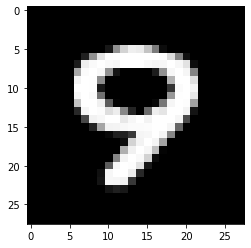

Gray Scale Img Shape --> (28, 28, 1)
Top 3 Predicted Results :  [9, 7, 8]


In [113]:
img_=Import_Test_Image("9.png")
Predict(img_)